# Homework 2.2: The Quest For A Better Network

In this assignment you will build a monster network to solve CIFAR10 image classification.

This notebook is intended as a sequel to seminar 3, please give it a try if you haven't done so yet.

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +20% for describing your iteration path in a report below.
* +20% for building a network that gets above 20% accuracy
* +10% for beating each of these milestones on __TEST__ dataset:
    * 50% (50% points)
    * 60% (60% points)
    * 65% (70% points)
    * 70% (80% points)
    * 75% (90% points)
    * 80% (full points)
    
## Restrictions
* Please do NOT use pre-trained networks for this assignment until you reach 80%.
 * In other words, base milestones must be beaten without pre-trained nets (and such net must be present in the e-mail). After that, you can use whatever you want.
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

## Tips on what can be done:


 * __Network size__
   * MOAR neurons, 
   * MOAR layers, ([torch.nn docs](http://pytorch.org/docs/master/nn.html))

   * Nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.

   * Ph'nglui mglw'nafh Cthulhu R'lyeh wgah'nagl fhtagn!


### The main rule of prototyping: one change at a time
   * By now you probably have several ideas on what to change. By all means, try them out! But there's a catch: __never test several new things at once__.


### Optimization
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
   * You should certainly use adaptive optimizers
     * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs
   * __BatchNormalization__ (nn.BatchNorm2d) for the win!
     * Sometimes more batch normalization is better.
   * __Regularize__ to prevent overfitting
     * Add some L2 weight norm to the loss function, PyTorch will do the rest
       * Can be done manually or like [this](https://discuss.pytorch.org/t/simple-l2-regularization/139/2).
     * Dropout (`nn.Dropout`) - to prevent overfitting
       * Don't overdo it. Check if it actually makes your network better
   
### Convolution architectures
   * This task __can__ be solved by a sequence of convolutions and poolings with batch_norm and ReLU seasoning, but you shouldn't necessarily stop there.
   * [Inception family](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/), [ResNet family](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035?gi=9018057983ca), [Densely-connected convolutions (exotic)](https://arxiv.org/abs/1608.06993), [Capsule networks (exotic)](https://arxiv.org/abs/1710.09829)
   * Please do try a few simple architectures before you go for resnet-152.
   * Warning! Training convolutional networks can take long without GPU. That's okay.
     * If you are CPU-only, we still recomment that you try a simple convolutional architecture
     * a perfect option is if you can set it up to run at nighttime and check it up at the morning.
     * Make reasonable layer size estimates. A 128-neuron first convolution is likely an overkill.
     * __To reduce computation__ time by a factor in exchange for some accuracy drop, try using __stride__ parameter. A stride=2 convolution should take roughly 1/4 of the default (stride=1) one.
 
   
### Data augmemntation
   * getting 5x as large dataset for free is a great 
     * Zoom-in+slice = move
     * Rotate+zoom(to remove black stripes)
     * Add Noize (gaussian or bernoulli)
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
     * Other cool libraries: cv2, skimake, PIL/Pillow
   * A more advanced way is to use torchvision transforms:
    ```
    transform_train = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])
    trainset = torchvision.datasets.CIFAR10(root=path_to_cifar_like_in_seminar, train=True, download=True, transform=transform_train)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

    ```
   * Or use this tool from Keras (requires theano/tensorflow): [tutorial](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), [docs](https://keras.io/preprocessing/image/)
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.
   
```

```

```

```

```

```

```

```


   
There is a template for your solution below that you can opt to use or throw away and write it your way.

In [1]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!wget https://raw.githubusercontent.com/fakefeik/Practical_DL/ekb2018/week03_convnets/cifar.py

tcmalloc: large alloc 1073750016 bytes == 0x58906000 @  0x7fbbdd1ab2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
--2018-10-25 16:39:42--  https://raw.githubusercontent.com/fakefeik/Practical_DL/ekb2018/week03_convnets/cifar.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2396 (2.3K) [text/plain]
Saving to: ‘cifar.py’

cifar.py            100%[===================>]   2.34K  --.-KB/s    in 0s      

2018-10-25 16:39:42 (38.2 MB/s) - ‘cifar.py’ saved [2396/2396]



In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from cifar import load_cifar10
X_train,y_train,X_val,y_val,X_test,y_test = load_cifar10("cifar_data")
class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print(X_train.shape,y_train.shape)

Dataset not found. Downloading...
(40000, 3, 32, 32) (40000,)


In [4]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

use_cuda = torch.cuda.is_available()
use_cuda, torch.version.cuda, torch.__version__

(True, '9.2.148', '0.4.1')

In [0]:
def compute_loss(X_batch, y_batch):
    if use_cuda:
        X_batch = Variable(torch.FloatTensor(X_batch)).cuda()
        y_batch = Variable(torch.LongTensor(y_batch)).cuda()
    else:
        X_batch = Variable(torch.FloatTensor(X_batch))
        y_batch = Variable(torch.LongTensor(y_batch))
    logits = model(X_batch)
    return F.cross_entropy(logits, y_batch).mean()

__ Training __

In [0]:
def iterate_minibatches(X, y, batchsize):
    indices = np.random.permutation(np.arange(len(X)))
    for start in range(0, len(indices), batchsize):
        ix = indices[start: start + batchsize]
        yield X[ix], y[ix]

In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(8))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(8*15*15, 128))
model.add_module('dense_1_bn', nn.BatchNorm1d(128))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))
model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

In [0]:
import time
from torchvision import transforms

means = np.array((0.4914, 0.4822, 0.4465))
stds = np.array((0.2023, 0.1994, 0.2010))

transform_augment = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation([-30, 30]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(means, stds),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(means, stds),
])

def train(name, model, opt, num_epochs=100, batch_size=50, early_stop_after=10, save_best=True, augment=False):
    train_loss_means = []
    val_accuracy_means = []
    
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        start_time = time.time()
        model.train(True) # enable dropout / batch_norm training behavior
        train_loss = []
        for X_batch, y_batch in iterate_minibatches(X_train, y_train, batch_size):
            if augment:
                X_batch = np.array([transform_augment((np.transpose(x, [1, 2, 0])*255).astype(np.uint8)).numpy() for x in X_batch])
            # train on batch
            loss = compute_loss(X_batch, y_batch)
            loss.backward()
            opt.step()
            opt.zero_grad()
            loss_data = loss.data[0]
            if use_cuda:
                loss_data = loss_data.cpu()
            train_loss.append(loss_data.numpy())

        # And a full pass over the validation data:
        model.train(False) # disable dropout / use averages for batch_norm
        val_accuracy = []
        for X_batch, y_batch in iterate_minibatches(X_val, y_val, batch_size):
            if augment:
                X_batch = np.array([transform_test((np.transpose(x, [1, 2, 0])*255).astype(np.uint8)).numpy() for x in X_batch])
            X_batch_var = Variable(torch.FloatTensor(X_batch))
            if use_cuda:
                X_batch_var = X_batch_var.cuda()
            logits = model(X_batch_var)
            y_pred_data = logits.max(1)[1].data
            if use_cuda:
                y_pred_data = y_pred_data.cpu()
            y_pred = y_pred_data.numpy()
            val_accuracy.append(np.mean(y_batch == y_pred))
        
        train_loss_means.append(np.mean(train_loss))
        val_accuracy_means.append(np.mean(val_accuracy))
        
        local_max = np.max(val_accuracy_means)
        
        if save_best and val_accuracy_means[-1] == local_max:
            torch.save(model.state_dict(), name)
        
        t = time.time() - start_time
        print(f'\rEpoch #{epoch + 1}/{num_epochs} took {t:.3f}s, loss: {train_loss_means[-1]:.6f}, val_acc: {val_accuracy_means[-1]*100:.2f}', end='')
        
        if len(val_accuracy_means) > early_stop_after and local_max not in val_accuracy_means[-early_stop_after:]:
            print(f'\nEarly stopped after epoch #{epoch + 1}')
            break
    print(f'Best validation accuracy: {np.max(val_accuracy_means):.4f}' + (f', best model saved to "{name}"' if save_best else ''))
    
    plt.title(name)
    plt.xlabel('n_epoch')
    plt.ylabel('accuracy')
    plt.plot(list(range(1, len(val_accuracy_means) + 1)), val_accuracy_means)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #22/100 took 5.253s, loss: 0.304742, val_acc: 60.49
Early stopped after epoch #22
Best validation accuracy: 0.6238, best model saved to "model_basic"


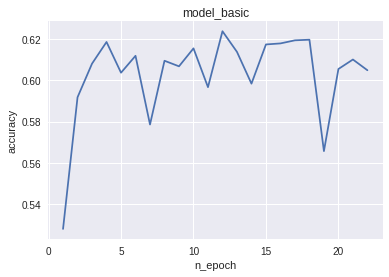

In [91]:
train('model_basic', model, torch.optim.Adam(model.parameters()))

In [0]:
model.load_state_dict(torch.load('model_basic'))

In [0]:
def print_test_accuracy(model, augmented=False):
    model.train(False) # disable dropout / use averages for batch_norm
    test_batch_acc = []
    for X_batch, y_batch in iterate_minibatches(X_test, y_test, 500):
        if augmented:
            X_batch = np.array([transform_test((np.transpose(x, [1, 2, 0])*255).astype(np.uint8)).numpy() for x in X_batch])
        X_batch_var = Variable(torch.FloatTensor(X_batch))
        if use_cuda:
            X_batch_var = X_batch_var.cuda()
        logits = model(X_batch_var)
        y_pred_data = logits.max(1)[1].data
        if use_cuda:
            y_pred_data = y_pred_data.cpu()
        y_pred = y_pred_data.numpy()
        test_batch_acc.append(np.mean(y_batch == y_pred))

    test_accuracy = np.mean(test_batch_acc)

    print("Final results:")
    print("  test accuracy:\t\t{:.2f} %".format(
        test_accuracy * 100))

    if test_accuracy * 100 > 95:
        print("Double-check, than consider applying for NIPS'17. SRSly.")
    elif test_accuracy * 100 > 90:
        print("U'r freakin' amazin'!")
    elif test_accuracy * 100 > 80:
        print("Achievement unlocked: 110lvl Warlock!")
    elif test_accuracy * 100 > 70:
        print("Achievement unlocked: 80lvl Warlock!")
    elif test_accuracy * 100 > 60:
        print("Achievement unlocked: 70lvl Warlock!")
    elif test_accuracy * 100 > 50:
        print("Achievement unlocked: 60lvl Warlock!")
    else:
        print("We need more magic! Follow instructons below")

In [94]:
print_test_accuracy(model)

Final results:
  test accuracy:		61.17 %
Achievement unlocked: 70lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(16*15*15, 128))
model.add_module('dense_1_bn', nn.BatchNorm1d(128))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))
model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #19/100 took 5.224s, loss: 0.198800, val_acc: 64.58
Early stopped after epoch #19
Best validation accuracy: 0.6474, best model saved to "model_more_channels"


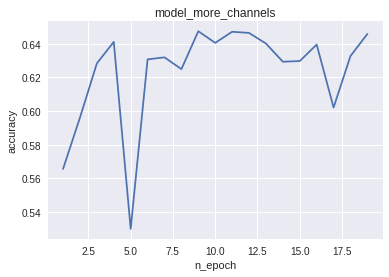

In [96]:
train('model_more_channels', model, torch.optim.Adam(model.parameters()))

In [97]:
model.load_state_dict(torch.load('model_more_channels'))
print_test_accuracy(model)

Final results:
  test accuracy:		63.97 %
Achievement unlocked: 70lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(8))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('conv_2', nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3)))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(16*6*6, 128))
model.add_module('dense_1_bn', nn.BatchNorm1d(128))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))
model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #23/100 took 6.359s, loss: 0.505329, val_acc: 65.28
Early stopped after epoch #23
Best validation accuracy: 0.6667, best model saved to "model_add_conv"


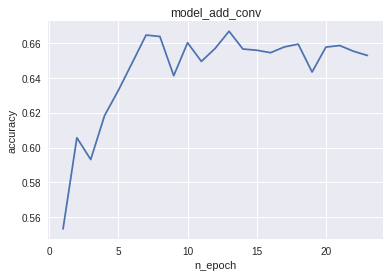

In [99]:
train('model_add_conv', model, torch.optim.Adam(model.parameters()))

In [100]:
model.load_state_dict(torch.load('model_add_conv'))
print_test_accuracy(model)

Final results:
  test accuracy:		66.15 %
Achievement unlocked: 70lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(32*6*6, 128))
model.add_module('dense_1_bn', nn.BatchNorm1d(128))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))
model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #20/100 took 6.369s, loss: 0.245386, val_acc: 69.20
Early stopped after epoch #20
Best validation accuracy: 0.7100, best model saved to "model_add_conv_more_channels"


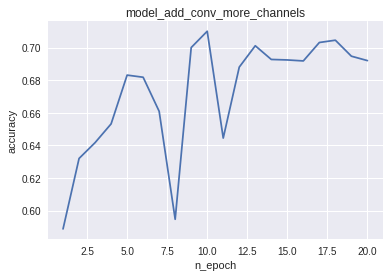

In [102]:
train('model_add_conv_more_channels', model, torch.optim.Adam(model.parameters()))

In [103]:
model.load_state_dict(torch.load('model_add_conv_more_channels'))
print_test_accuracy(model)

Final results:
  test accuracy:		70.67 %
Achievement unlocked: 80lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)))
model.add_module('conv_2_bn', nn.BatchNorm2d(32))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())

model.add_module('conv_3', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3)))
model.add_module('conv_3_bn', nn.BatchNorm2d(64))
model.add_module('pool_3', nn.MaxPool2d(2, 2))
model.add_module('conv_3_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(64*2*2, 128))
model.add_module('dense_1_bn', nn.BatchNorm1d(128))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))
model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #20/100 took 8.662s, loss: 0.389865, val_acc: 69.63
Early stopped after epoch #20
Best validation accuracy: 0.7229, best model saved to "model_3_conv"


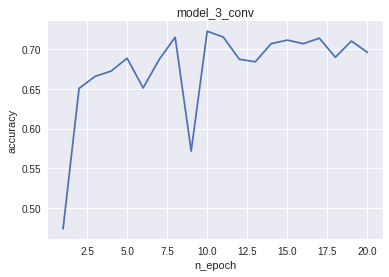

In [105]:
train('model_3_conv', model, torch.optim.Adam(model.parameters()))

In [106]:
model.load_state_dict(torch.load('model_3_conv'))
print_test_accuracy(model)

Final results:
  test accuracy:		72.03 %
Achievement unlocked: 80lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(32*6*6, 256))
model.add_module('dense_1_bn', nn.BatchNorm1d(256))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))
model.add_module('dense_2_logits', nn.Linear(256, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #20/100 took 6.343s, loss: 0.129396, val_acc: 70.03
Early stopped after epoch #20
Best validation accuracy: 0.7085, best model saved to "model_bigger_dense"


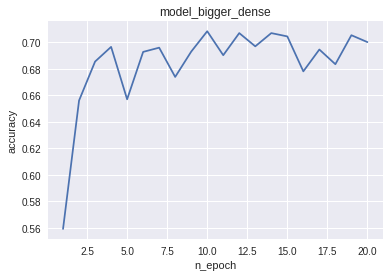

In [108]:
train('model_bigger_dense', model, torch.optim.Adam(model.parameters()))

In [109]:
model.load_state_dict(torch.load('model_bigger_dense'))
print_test_accuracy(model)

Final results:
  test accuracy:		70.59 %
Achievement unlocked: 80lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)))
model.add_module('conv_2_bn', nn.BatchNorm2d(32))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())

model.add_module('conv_3', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3)))
model.add_module('conv_3_bn', nn.BatchNorm2d(64))
model.add_module('pool_3', nn.MaxPool2d(2, 2))
model.add_module('conv_3_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(64*2*2, 256))
model.add_module('dense_1_bn', nn.BatchNorm1d(256))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))

model.add_module('dense_2', nn.Linear(256, 128))
model.add_module('dense_2_bn', nn.BatchNorm1d(128))
model.add_module('dense_2_relu', nn.ReLU())

model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #21/100 took 9.898s, loss: 0.280474, val_acc: 71.20
Early stopped after epoch #21
Best validation accuracy: 0.7269, best model saved to "model_2_dense"


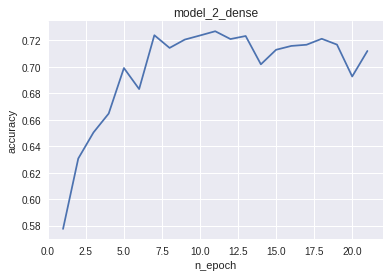

In [111]:
train('model_2_dense', model, torch.optim.Adam(model.parameters()))

In [112]:
model.load_state_dict(torch.load('model_2_dense'))
print_test_accuracy(model)

Final results:
  test accuracy:		72.34 %
Achievement unlocked: 80lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)))
model.add_module('conv_2_bn', nn.BatchNorm2d(32))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())

model.add_module('conv_3', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3)))
model.add_module('conv_3_bn', nn.BatchNorm2d(64))
model.add_module('pool_3', nn.MaxPool2d(2, 2))
model.add_module('conv_3_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(64*2*2, 256))
model.add_module('dense_1_bn', nn.BatchNorm1d(256))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))

model.add_module('dense_2', nn.Linear(256, 128))
model.add_module('dense_2_bn', nn.BatchNorm1d(128))
model.add_module('dense_2_relu', nn.ReLU())

model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #22/100 took 4.075s, loss: 0.219922, val_acc: 68.84
Early stopped after epoch #22
Best validation accuracy: 0.7074, best model saved to "model_inc_batch_size"


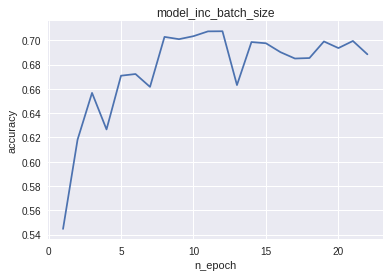

In [123]:
train('model_inc_batch_size', model, torch.optim.Adam(model.parameters()), batch_size=128)

In [124]:
model.load_state_dict(torch.load('model_inc_batch_size'))
print_test_accuracy(model)

Final results:
  test accuracy:		70.59 %
Achievement unlocked: 80lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)))
model.add_module('conv_2_bn', nn.BatchNorm2d(32))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())

model.add_module('conv_3', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3)))
model.add_module('conv_3_bn', nn.BatchNorm2d(64))
model.add_module('pool_3', nn.MaxPool2d(2, 2))
model.add_module('conv_3_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(64*2*2, 256))
model.add_module('dense_1_bn', nn.BatchNorm1d(256))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))

model.add_module('dense_2', nn.Linear(256, 128))
model.add_module('dense_2_bn', nn.BatchNorm1d(128))
model.add_module('dense_2_relu', nn.ReLU())

model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #53/100 took 28.003s, loss: 0.810589, val_acc: 77.28
Early stopped after epoch #53
Best validation accuracy: 0.7743, best model saved to "model_2_dense_aug"


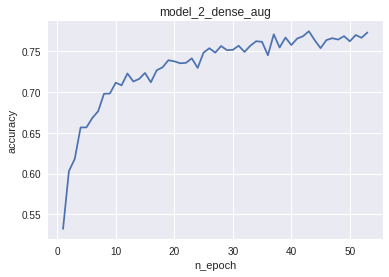

In [39]:
train('model_2_dense_aug', model, torch.optim.Adam(model.parameters()), augment=True)

In [40]:
model.load_state_dict(torch.load('model_2_dense_aug'))
print_test_accuracy(model, augmented=True)

Final results:
  test accuracy:		76.75 %
Achievement unlocked: 80lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)))
model.add_module('conv_2_bn', nn.BatchNorm2d(32))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())

model.add_module('conv_3', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3)))
model.add_module('conv_3_bn', nn.BatchNorm2d(64))
model.add_module('pool_3', nn.MaxPool2d(2, 2))
model.add_module('conv_3_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(64*2*2, 256))
model.add_module('dense_1_bn', nn.BatchNorm1d(256))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.4))

model.add_module('dense_2', nn.Linear(256, 128))
model.add_module('dense_2_bn', nn.BatchNorm1d(128))
model.add_module('dense_2_relu', nn.ReLU())

model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #73/100 took 28.945s, loss: 0.871412, val_acc: 76.16
Early stopped after epoch #73
Best validation accuracy: 0.7696, best model saved to "model_2_dense_aug_drop"


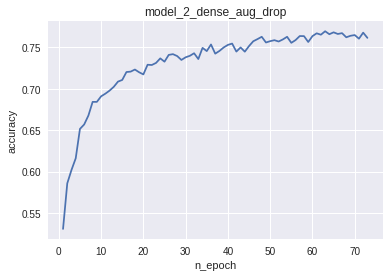

In [42]:
train('model_2_dense_aug_drop', model, torch.optim.Adam(model.parameters()), augment=True)

In [43]:
model.load_state_dict(torch.load('model_2_dense_aug_drop'))
print_test_accuracy(model, augmented=True)

Final results:
  test accuracy:		76.74 %
Achievement unlocked: 80lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('pool_1', nn.MaxPool2d((2, 2)))
model.add_module('conv_1_relu', nn.ReLU())
model.add_module("drop_1", nn.Dropout2d(0.1))

model.add_module('conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)))
model.add_module('conv_2_bn', nn.BatchNorm2d(32))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())
model.add_module("drop_2", nn.Dropout2d(0.1))

model.add_module('conv_3', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3)))
model.add_module('conv_3_bn', nn.BatchNorm2d(64))
model.add_module('pool_3', nn.MaxPool2d(2, 2))
model.add_module('conv_3_relu', nn.ReLU())
model.add_module("drop_3", nn.Dropout2d(0.1))

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(64*2*2, 256))
model.add_module('dense_1_bn', nn.BatchNorm1d(256))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.4))

model.add_module('dense_2', nn.Linear(256, 128))
model.add_module('dense_2_bn', nn.BatchNorm1d(128))
model.add_module('dense_2_relu', nn.ReLU())

model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #54/100 took 30.529s, loss: 1.207002, val_acc: 70.37
Early stopped after epoch #54
Best validation accuracy: 0.7081, best model saved to "model_more_dropout"


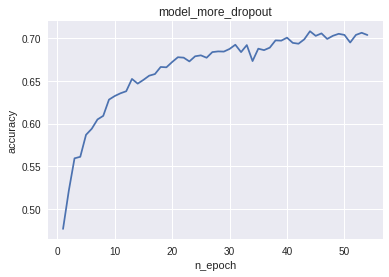

In [45]:
train('model_more_dropout', model, torch.optim.Adam(model.parameters()), augment=True)

In [46]:
model.load_state_dict(torch.load('model_more_dropout'))
print_test_accuracy(model, augmented=True)

Final results:
  test accuracy:		69.48 %
Achievement unlocked: 70lvl Warlock!


In [0]:
model = nn.Sequential()

model.add_module('conv_1', nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3)))
model.add_module('conv1_bn', nn.BatchNorm2d(16))
model.add_module('conv_1_relu', nn.ReLU())

model.add_module('conv_2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3)))
model.add_module('conv_2_bn', nn.BatchNorm2d(32))
model.add_module('pool_2', nn.MaxPool2d(2, 2))
model.add_module('conv_2_relu', nn.ReLU())

model.add_module('conv_3', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3)))
model.add_module('conv_3_bn', nn.BatchNorm2d(64))
model.add_module('pool_3', nn.MaxPool2d(2, 2))
model.add_module('conv_3_relu', nn.ReLU())

model.add_module('conv_4', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3)))
model.add_module('conv_4_bn', nn.BatchNorm2d(128))
model.add_module('pool_4', nn.MaxPool2d(2, 2))
model.add_module('conv_4_relu', nn.ReLU())

model.add_module('flatten', Flatten())
model.add_module('dense_1', nn.Linear(128*2*2, 256))
model.add_module('dense_1_bn', nn.BatchNorm1d(256))
model.add_module('dense_1_relu', nn.ReLU())

model.add_module('drop', nn.Dropout(0.1))

model.add_module('dense_2', nn.Linear(256, 128))
model.add_module('dense_2_bn', nn.BatchNorm1d(128))
model.add_module('dense_2_relu', nn.ReLU())

model.add_module('dense_2_logits', nn.Linear(128, 10))

if use_cuda:
    model = model.cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch #72/100 took 30.128s, loss: 0.537085, val_acc: 83.85
Early stopped after epoch #72
Best validation accuracy: 0.8420, best model saved to "model_4_conv"


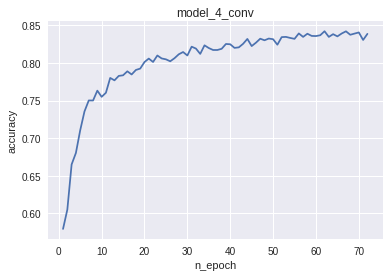

In [50]:
train('model_4_conv', model, torch.optim.Adam(model.parameters()), augment=True)

In [51]:
model.load_state_dict(torch.load('model_4_conv'))
print_test_accuracy(model, augmented=True)

Final results:
  test accuracy:		84.23 %
Achievement unlocked: 110lvl Warlock!


```

```

```

```

```

```


# Report

All creative approaches are highly welcome, but at the very least it would be great to mention
* the idea;
* brief history of tweaks and improvements;
* what is the final architecture and why?
* what is the training method and, again, why?
* Any regularizations and other techniques applied and their effects;


There is no need to write strict mathematical proofs (unless you want to).
 * "I tried this, this and this, and the second one turned out to be better. And i just didn't like the name of that one" - OK, but can be better
 * "I have analized these and these articles|sources|blog posts, tried that and that to adapt them to my problem and the conclusions are such and such" - the ideal one
 * "I took that code that demo without understanding it, but i'll never confess that and instead i'll make up some pseudoscientific explaination" - __not_ok__

In [54]:
import pandas as pd

data = {
    '1conv': 61.17,
    '1conv_more_channels': 63.97,
    '2conv': 66.15,
    '2conv_more_channels': 70.67,
    '3conv': 72.03,
    '2conv_bigger_dense': 70.59,
    '3conv_2dense': 72.34,
    '3conv_2dense_inc_batch_size': 70.59,
    '3conv_2dense_aug': 76.75,
    '3conv_2dense_aug_inc_drop': 76.74,
    '3conv_2dense_aug_conv_drop': 69.48,
    '4conv_aug': 84.23
}

titles, values = zip(*sorted(data.items(), key=lambda x: x[1]))

pd.DataFrame.from_dict({'title': titles, 'accuracy': values})

,accuracy,title
0,61.17,1conv
1,63.97,1conv_more_channels
2,66.15,2conv
3,69.48,3conv_2dense_aug_conv_drop
4,70.59,2conv_bigger_dense
5,70.59,3conv_2dense_inc_batch_size
6,70.67,2conv_more_channels
7,72.03,3conv
8,72.34,3conv_2dense
9,76.74,3conv_2dense_aug_inc_drop


* Started with baseline solution with 1 convolution layer and one dense layer (`1conv` in table, accuracy `61.17`)
* Added more channels to that layer which increased accuracy (`1conv_more_channels` in table, accuracy `63.97`)
* Added second convolution layer which increased accuracy (`2conv` in table, accuracy `66.15`)
* Increased channels count with two conv layers, accuracy increased (`2conv_more_channels` in table, accuracy `70.67`)
* Added yet another conv layer, accuracy - `72.03` (`3conv`)
* Increased dense layer in model with 2 conv layers, accuracy didn't increase (`2conv_bigger_dense`, `70.59`)
* Added second dense layer in model with 3 conv layers, accuracy increased insignificantly (`3conv_2dense`,  `72.34`)
* Tried to increase batch size, accuracy decreased (`3conv_2dense_inc_batch_size`, `70.59`)
* Tried to feed augmented images during training, accuracy increased significantly (`3conv_2dense_aug`, `76.75`)
* Tried increasing dropout, accuracy did not increase (`3conv_2dense_aug_inc_drop`, `76.74`)
* Added small dropout after each conv layer, accuracy decreased significantly (`3conv_2dense_aug_conv_drop`, `69.48`)
* Finally added another conv layer and removed first max pooling so that there would be enough data for another conv layer, accuracy increased (`4conv_aug`, `84.23`)

### Hi, my name is `Pavel Vostretsov`, and here's my story

A long time ago in a galaxy far far away, when it was still more than an hour before the deadline, i got an idea:

##### I gonna build a neural network, that
* predicts classes of images
* has some convolutional layers, maxpooling layers and batchnorm
* because it should work pretty well

How could i be so naive?!

##### One day, with no signs of warning,
This thing has finally converged and
* got 84.23 accuracy on test,
* data augmentation helped a lot, adding convolution layers and additional dense layer also hepled; dropout layers made it worse and were discarded in final model 
* additionally, I tried to add dropout after each conv layer, but it made things worse, so it was discarded in final model; also tried to increase batch size, it made things worse too

##### Finally, after 11  iterations, many mugs of [tea/coffee]
* final architecture was 4 conv layers with batch norm and relu activation (first without maxpooling, other 3 with maxpooling) + 2 dense layers with batch norm and relu
* data augmentation during training was used, used Adam optimizer with default step

That, having wasted several days of my life training, got

* accuracy on validation: 84.20
* accuracy on test: 84.23